# Phase 1-1: Member County Activity

* Purpose: This file attempts to aggregate member's account data based on their counties and classify them into distinct activity groups.

## Importing Packages and Data

In [104]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

In [105]:
member_level_df = pd.read_csv('data/Member_Level_Dataset.csv')
member_level_df.head()

,Unique_Member_Identifier,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,...,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
0,360faa7e8e345d2725f92460ca39696ad885b876805328...,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4ef271022b929dd2ea56f3c0e9a7efae346a07e40f6ea1...,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,f868c8fb32d526c00024e408fdd712e881de936372bef8...,2022-01-31,38,MetroWest,32765,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4fe6ec028a8a5234bb02fbe97488fb9431109a292ee8bc...,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,f46df5083939ce116be51669af3315c474655c936204c2...,2022-01-31,47,East Orlando,32825,3,2,1,0,0,...,0,0,0,0,0,1,2,2,0,1


In [106]:
# Map BranchCategory to County
city_to_county_mapping = {
    'Addition Financial Arena': 'Orange',
    'Altamonte Springs': 'Seminole',
    'Apopka': 'Orange',
    'Clermont': 'Lake',
    'Downtown Campus': 'Orange',
    'East Orlando': 'Orange',
    'Eustis': 'Lake',
    'Fern Park': 'Seminole',
    'Kissimmee': 'Osceola',
    'Lake Mary': 'Seminole',
    'Lake Nona': 'Orange',
    'Leesburg': 'Lake',
    'Longwood': 'Seminole',
    'Merritt Island': 'Brevard',
    'MetroWest': 'Orange',
    'Mills': 'Orange',
    'Orange City': 'Volusia',
    'Oviedo': 'Seminole',
    'Pine Hills': 'Orange',
    'Poinciana': 'Polk',
    'Sanford': 'Seminole',
    'Seminole State': 'Seminole',
    'South Orlando': 'Orange',
    'St. Cloud': 'Osceola',
    'The Loop': 'Osceola',
    'UCF Campus': 'Orange',
    'UCF Commons': 'Orange',
    'Winter Garden': 'Orange'
}


In [107]:
# print unique values for BranchCategory and their counts
print(member_level_df['BranchCategory'].value_counts())

BranchCategory
St. Cloud                    134896
East Orlando                 131519
Mills                        125138
Kissimmee                    112553
Winter Garden                105333
South Orlando                 95545
Apopka                        92884
Clermont                      76452
MetroWest                     69390
Pine Hills                    68944
Lake Mary                     66879
Altamonte Springs             61328
Fern Park                     61306
Sanford                       58922
Oviedo                        49606
Lake Nona                     46999
Orange City                   40486
Leesburg                      38424
Poinciana                     38310
The Loop                      34575
Longwood                      32469
UCF Campus                    31682
Virtual Branch                30058
Eustis                        26698
Merritt Island                13265
Downtown Campus                5441
Lake Brantley High School      1849
Oak Ridge Hig

C:\Users\perez\AppData\Local\Temp\ipykernel_22516\406215504.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(member_level_df['age'], bins=20, kde=True)


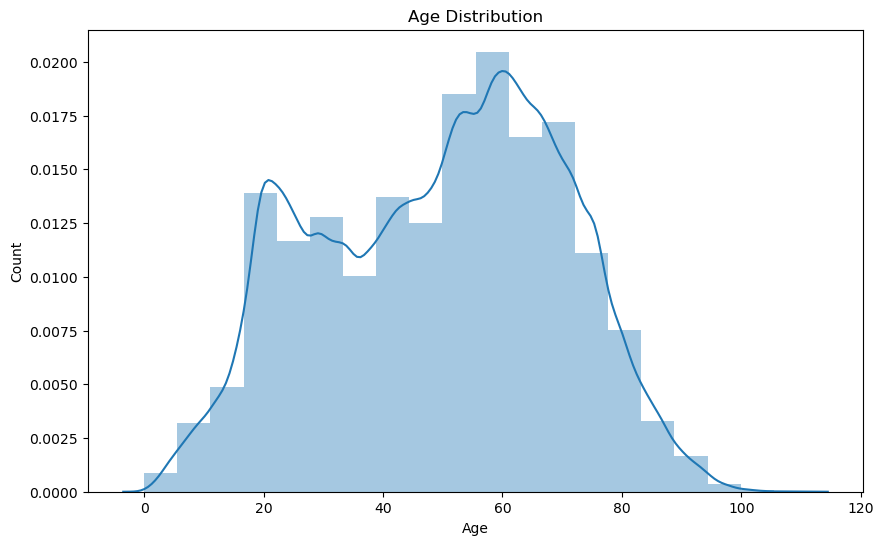

In [108]:
# Graph age distribution
plt.figure(figsize=(10, 6))
sns.distplot(member_level_df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [109]:
member_level_df.columns

Index(['Unique_Member_Identifier', 'EOM_TRANS_DATE', 'age', 'BranchCategory',
       'address_zip', 'n_accts', 'n_checking_accts', 'n_savings_accts',
       'n_open_loans', 'n_open_cds', 'n_open_club_accts',
       'n_open_credit_cards', 'ATMCount', 'BillPaymentCount', 'CashCount',
       'DraftCount', 'ACHCount', 'FeeCount', 'Credit_DebitCount',
       'Home_Banking', 'WireCount', 'DividendCount'],
      dtype='object')

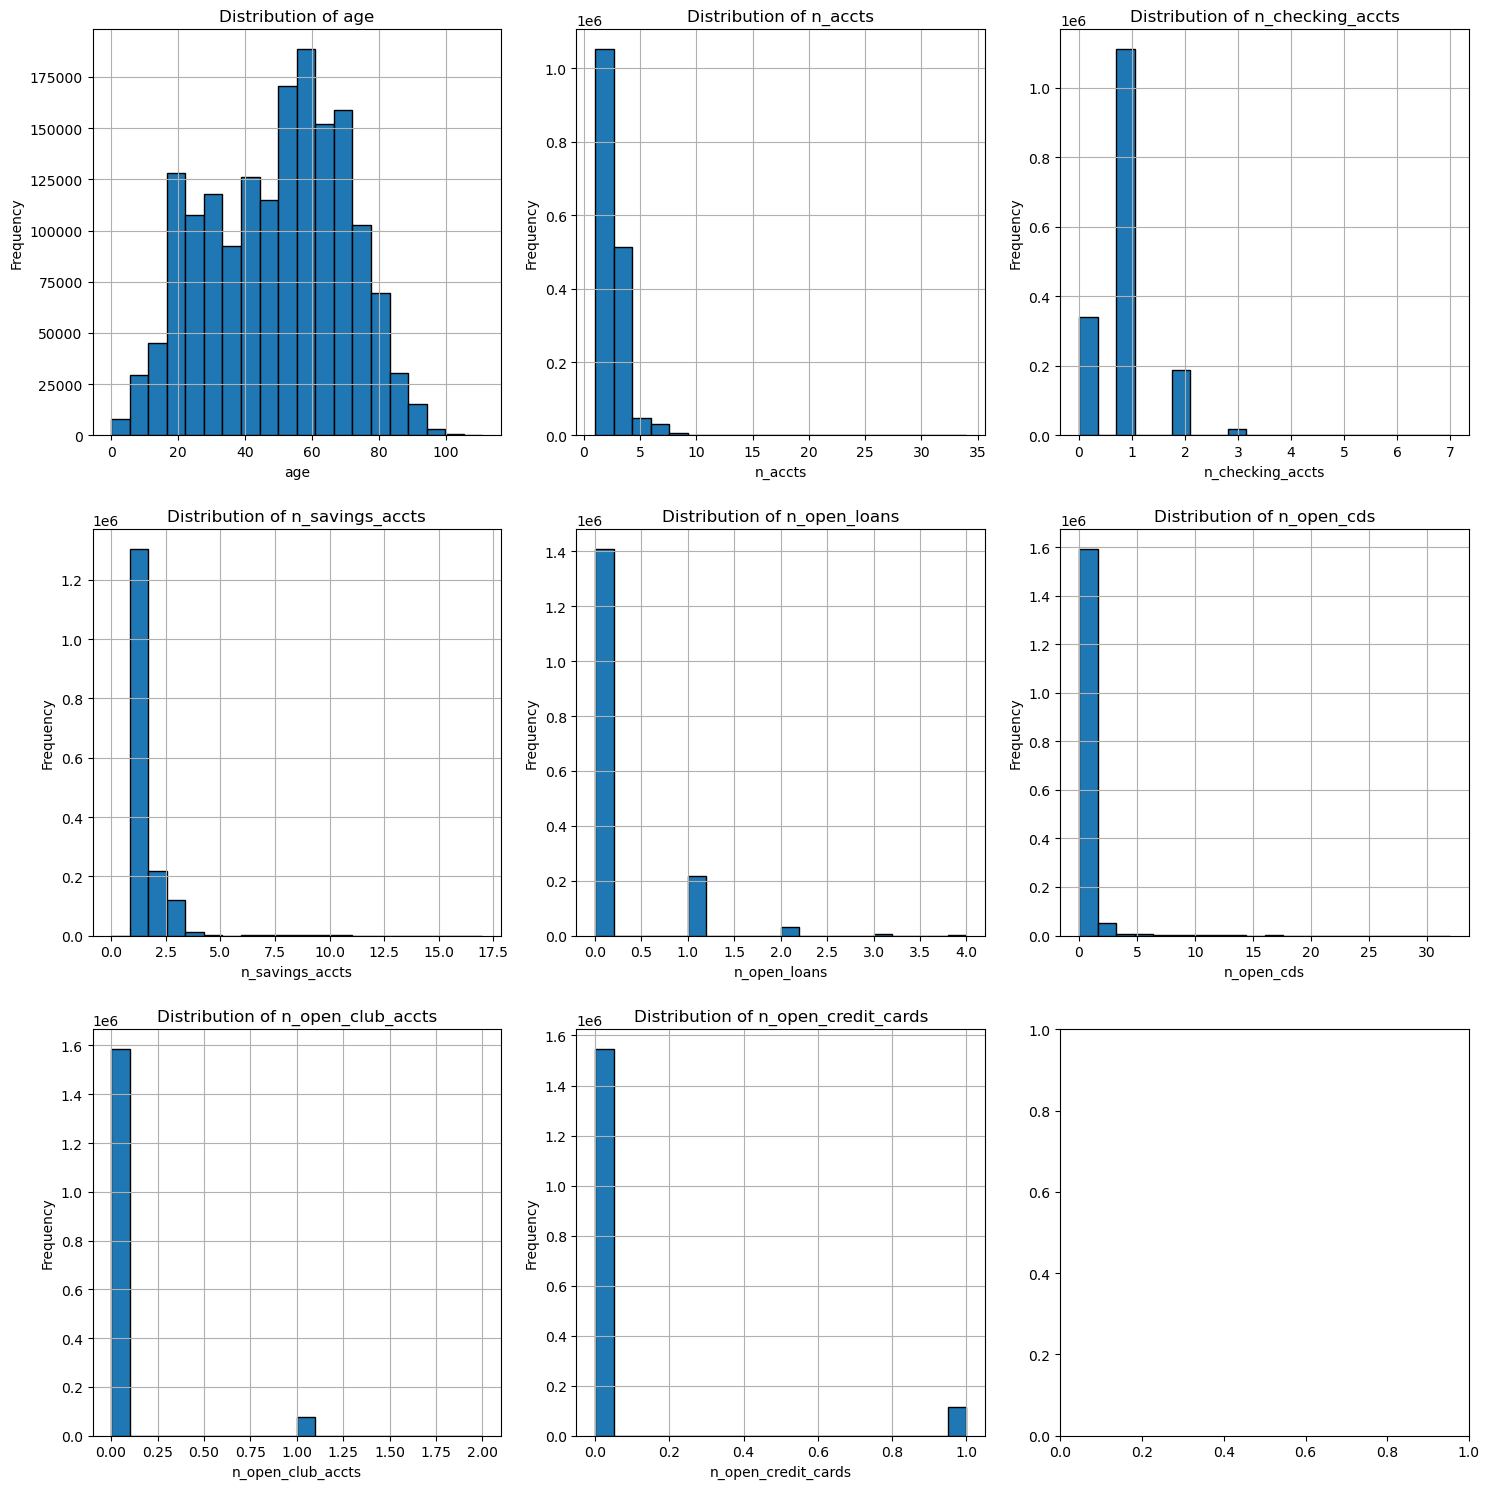

In [110]:
# Plot distribution graphs for each column
dist_df = member_level_df[['age', 'n_accts', 'n_checking_accts', 'n_savings_accts', 'n_open_loans', 'n_open_cds', 'n_open_club_accts', 'n_open_credit_cards']]

num_columns = len(dist_df.columns)
num_rows = (num_columns - 1) // 3 + 1  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, column in enumerate(dist_df.columns):                               
    row, col = divmod(i, 3)
    ax = axes[row, col]

    ax.hist(dist_df[column], bins=20, edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [111]:
dist_df.head()

,age,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,n_open_credit_cards
0,85,1,0,1,0,0,0,0
1,59,2,1,1,0,0,0,0
2,38,2,0,1,0,0,1,0
3,67,1,0,1,1,0,0,0
4,47,3,2,1,0,0,0,0


## Data Preprocessing

In [112]:
# Remove member identifiers
member_level_df = member_level_df.drop(columns=['Unique_Member_Identifier'])

In [113]:
# Remove the rows that contains 'Virtual Branch' in the 'BranchCategory' column
no_virtual_df = member_level_df[member_level_df['BranchCategory'] != 'Virtual Branch']

In [114]:
# Remove the rows that contains 'High School' in the name in 'BranchCategory' column
no_highschool_df = no_virtual_df[~member_level_df['BranchCategory'].str.contains('High School')]

C:\Users\perez\AppData\Local\Temp\ipykernel_22516\2725168190.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_highschool_df = no_virtual_df[~member_level_df['BranchCategory'].str.contains('High School')]


In [115]:
# Drop empty rows
no_highschool_df = no_highschool_df.dropna()

In [116]:
no_highschool_df.head()

,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,...,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
0,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2022-01-31,38,MetroWest,32765,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2022-01-31,47,East Orlando,32825,3,2,1,0,0,0,...,0,0,0,0,0,1,2,2,0,1


In [117]:
no_highschool_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1620529 entries, 0 to 1661363
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   EOM_TRANS_DATE       1620529 non-null  object
 1   age                  1620529 non-null  int64 
 2   BranchCategory       1620529 non-null  object
 3   address_zip          1620529 non-null  object
 4   n_accts              1620529 non-null  int64 
 5   n_checking_accts     1620529 non-null  int64 
 6   n_savings_accts      1620529 non-null  int64 
 7   n_open_loans         1620529 non-null  int64 
 8   n_open_cds           1620529 non-null  int64 
 9   n_open_club_accts    1620529 non-null  int64 
 10  n_open_credit_cards  1620529 non-null  int64 
 11  ATMCount             1620529 non-null  int64 
 12  BillPaymentCount     1620529 non-null  int64 
 13  CashCount            1620529 non-null  int64 
 14  DraftCount           1620529 non-null  int64 
 15  ACHCount            

In [118]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
no_highschool_df.describe()

,age,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,n_open_credit_cards,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
count,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000
mean,49.742,2.524,0.939,1.324,0.177,0.220,0.041,0.070,0.033,0.072,0.017,0.082,0.298,0.049,0.484,0.147,0.000,1.049
std,20.408,1.321,0.620,0.713,0.446,0.842,0.198,0.256,0.210,0.368,0.141,0.461,0.735,0.254,1.103,0.670,0.020,1.043
min,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,33.000,2.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,52.000,2.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,66.000,3.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,111.000,34.000,7.000,17.000,4.000,32.000,2.000,1.000,12.000,59.000,9.000,12.000,43.000,28.000,78.000,74.000,3.000,56.000


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# numerical columns
numerical_df = no_highschool_df.select_dtypes(include=['int64', 'float64'])

vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_df.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(numerical_df.shape[1])]
print(vif_data)

c:\Users\perez\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


               Variable   VIF
0                   age 4.469
1               n_accts   inf
2      n_checking_accts   inf
3       n_savings_accts   inf
4          n_open_loans 1.956
5            n_open_cds   inf
6     n_open_club_accts   inf
7   n_open_credit_cards 1.824
8              ATMCount 1.088
9      BillPaymentCount 1.067
10            CashCount 1.018
11           DraftCount 1.165
12             ACHCount 1.226
13             FeeCount 1.233
14    Credit_DebitCount 1.268
15         Home_Banking 1.089
16            WireCount 1.003
17        DividendCount 4.249


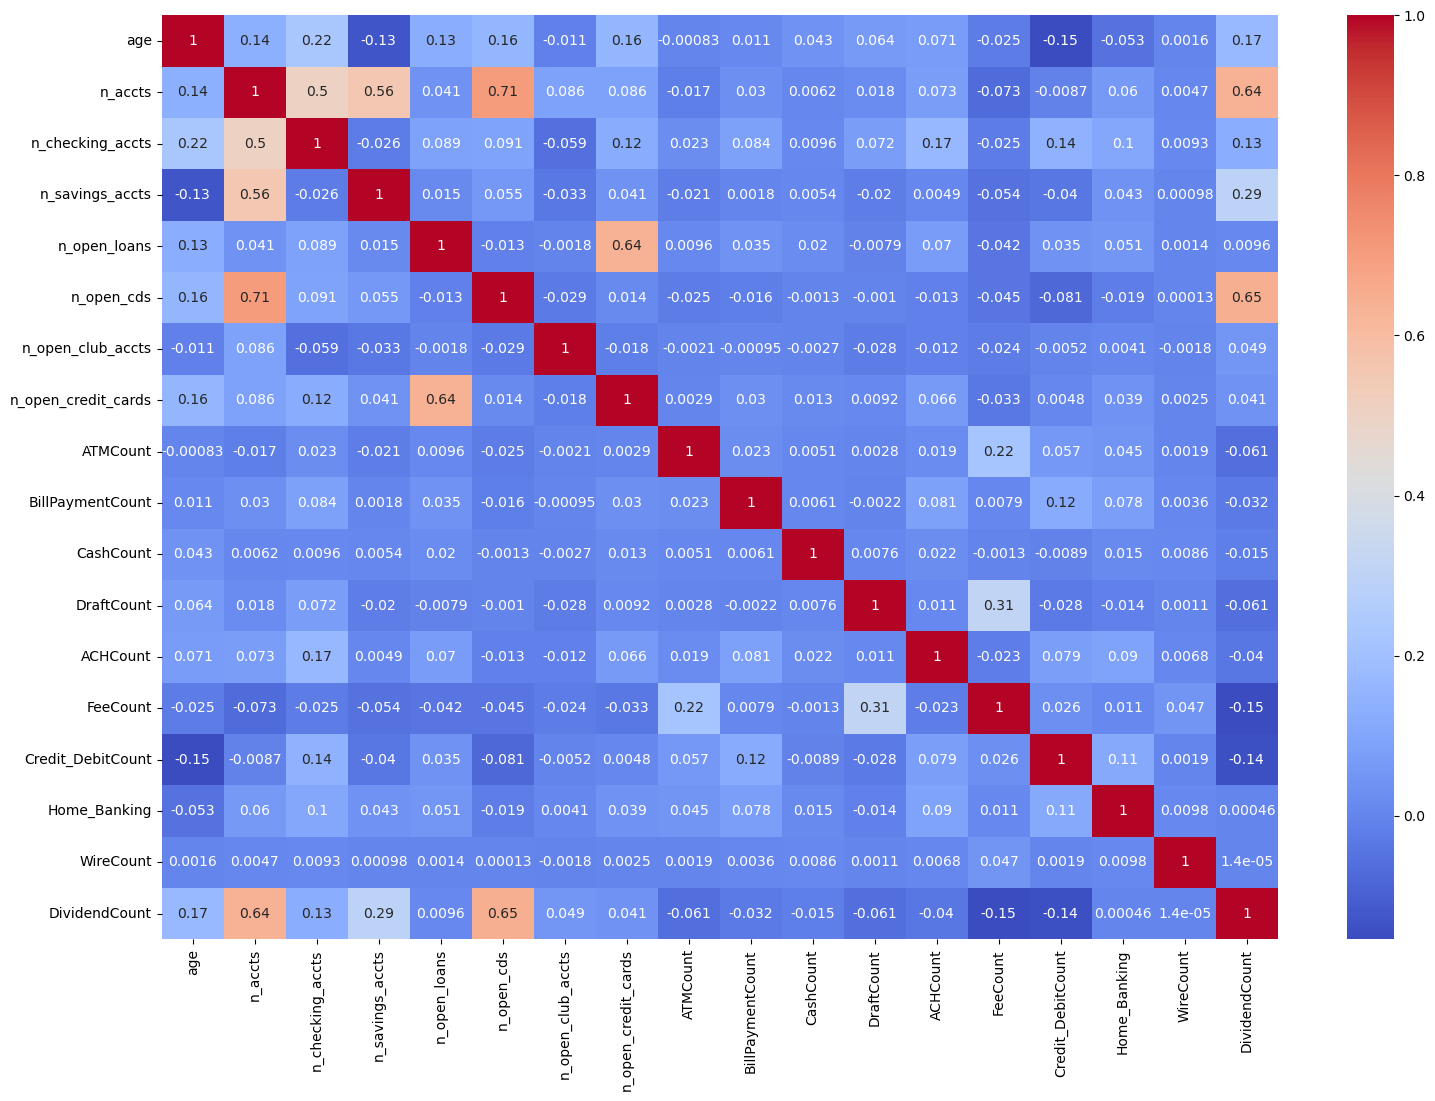

In [120]:
# Plot correlation matrix
corr = numerical_df.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [121]:
# Displays the number of unique values for each column
numerical_df.nunique().sort_values(ascending=False)

age                    109
DividendCount           46
Credit_DebitCount       40
Home_Banking            40
ACHCount                34
n_accts                 29
n_open_cds              27
BillPaymentCount        24
FeeCount                17
n_savings_accts         15
DraftCount              13
ATMCount                12
CashCount                9
n_checking_accts         8
n_open_loans             5
WireCount                4
n_open_club_accts        3
n_open_credit_cards      2
dtype: int64

In [122]:
county_df = no_highschool_df.copy()

county_df['County'] = county_df['BranchCategory'].map(city_to_county_mapping)

# Load revenue data
file_path = 'data/countyrevenuesbycategory.xlsx'
df_revenue = pd.read_excel(file_path)

# Selecting only 'County' and 'TOTAL - All Revenue Account Codes' columns
df_revenue = df_revenue.iloc[:, [0, -3]]
df_revenue.columns = ['County', 'Revenue_Per_County']
df_revenue = df_revenue.drop(0)

# Merging the DataFrames
county_df = pd.merge(county_df, df_revenue, on='County', how='left')

# Displaying the combined DataFrame
county_df.head()

,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,...,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount,County,Revenue_Per_County
0,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,Orange,6968835122
1,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,0,...,0,0,0,0,0,0,0,1,Orange,6968835122
2,2022-01-31,38,MetroWest,32765,2,0,1,0,0,1,...,0,0,0,0,0,0,0,1,Orange,6968835122
3,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,Osceola,1592120547
4,2022-01-31,47,East Orlando,32825,3,2,1,0,0,0,...,0,0,0,1,2,2,0,1,Orange,6968835122


In [123]:
# Assuming 'BranchCategory' uniquely identifies each branch
branch_count = county_df.groupby('County')['BranchCategory'].nunique()
branch_count.name = 'Branch_Count'

# Aggregate the member activity data by the 'County' column, summing up all the activity-related columns
county_activity_agg = county_df.groupby('County').agg({
    'DividendCount': 'sum',
    'Home_Banking': 'sum',
    'Credit_DebitCount': 'sum',
    'ACHCount': 'sum',
    'n_accts': 'sum',
    'n_open_cds': 'sum',
    'BillPaymentCount': 'sum',
    'FeeCount': 'sum',
    'n_savings_accts': 'sum',
    'DraftCount': 'sum',
    'ATMCount': 'sum',
    'CashCount': 'sum',
    'n_checking_accts': 'sum',
    'n_open_loans': 'sum',
    'WireCount': 'sum',
    'n_open_club_accts': 'sum',
    'n_open_credit_cards': 'sum'
}).reset_index()

# Calculate the total Activity per county
county_activity_agg['Total_Activity'] = county_activity_agg.drop('County', axis=1).sum(axis=1)

# Calculate the average Activity per branch for each county
county_activity_agg = county_activity_agg.merge(branch_count.reset_index(), on='County')
county_activity_agg['Average_Activity_Per_Branch'] = county_activity_agg['Total_Activity'] / county_activity_agg['Branch_Count']

# Display the DataFrame with total and average Activity
county_activity_agg[['County', 'Total_Activity', 'Branch_Count', 'Average_Activity_Per_Branch']]

,County,Total_Activity,Branch_Count,Average_Activity_Per_Branch
0,Brevard,94796,1,94796.000
1,Lake,1110490,3,370163.333
2,Orange,5820144,10,582014.400
3,Osceola,2087538,3,695846.000
4,Polk,264614,1,264614.000
5,Seminole,2510613,7,358659.000
6,Volusia,305654,1,305654.000


In [124]:
county_df.head()

,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,...,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount,County,Revenue_Per_County
0,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,Orange,6968835122
1,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,0,...,0,0,0,0,0,0,0,1,Orange,6968835122
2,2022-01-31,38,MetroWest,32765,2,0,1,0,0,1,...,0,0,0,0,0,0,0,1,Orange,6968835122
3,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,Osceola,1592120547
4,2022-01-31,47,East Orlando,32825,3,2,1,0,0,0,...,0,0,0,1,2,2,0,1,Orange,6968835122


* TODO: Explore applying weights to different activity columns

     County  Total_Activity  Branch_Count  Average_Activity_Per_Branch
3   Osceola         2087538             3                   695846.000
2    Orange         5820144            10                   582014.400
1      Lake         1110490             3                   370163.333
5  Seminole         2510613             7                   358659.000
6   Volusia          305654             1                   305654.000
4      Polk          264614             1                   264614.000
0   Brevard           94796             1                    94796.000


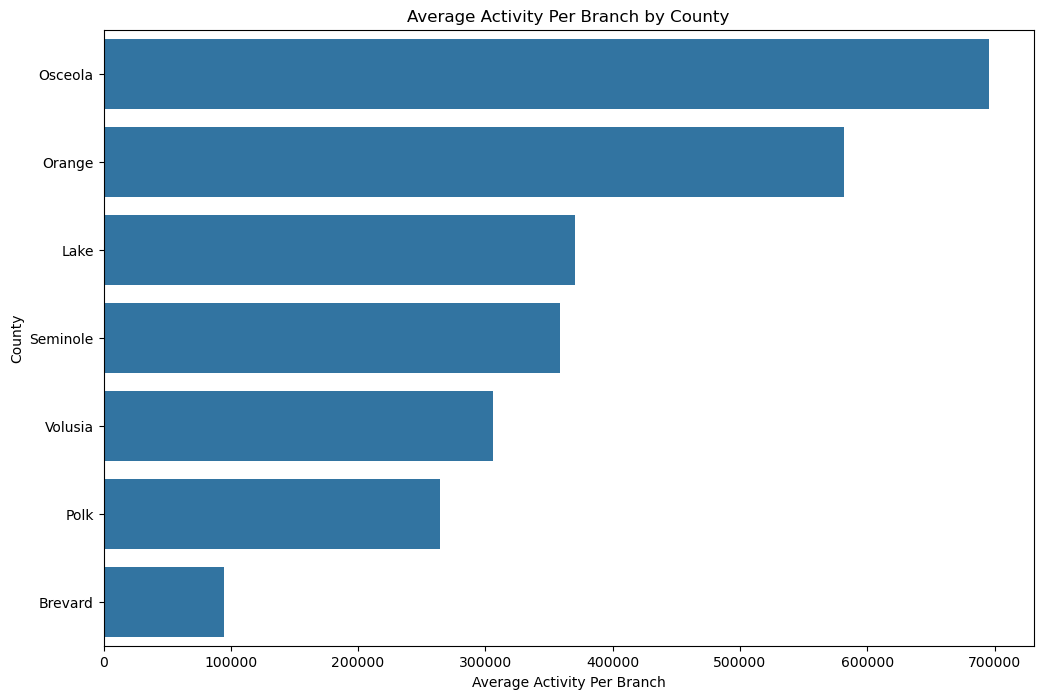

In [125]:
# Sorting counties by the average transactions per branch
county_activity_agg_sorted = county_activity_agg.sort_values(by='Average_Activity_Per_Branch', ascending=False)

# Displaying the counties with their average transaction data per branch
print(county_activity_agg_sorted[['County', 'Total_Activity', 'Branch_Count', 'Average_Activity_Per_Branch']])

# Visualization - Average Activity per Branch by County
plt.figure(figsize=(12, 8))
sns.barplot(y=county_activity_agg_sorted['County'], x=county_activity_agg_sorted['Average_Activity_Per_Branch'], )
plt.title('Average Activity Per Branch by County')
plt.ylabel('County')
plt.xlabel('Average Activity Per Branch')
plt.show()

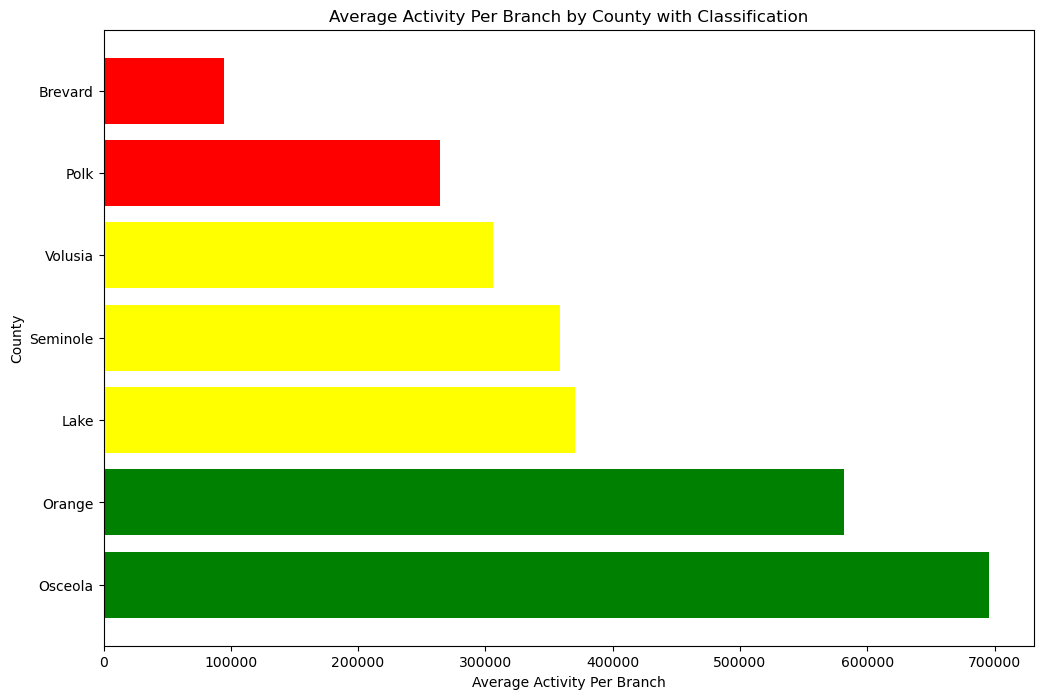

In [126]:
# Define classification thresholds
high_threshold = county_activity_agg_sorted['Average_Activity_Per_Branch'].quantile(0.75) # top 25%
medium_threshold = county_activity_agg_sorted['Average_Activity_Per_Branch'].quantile(0.25) # bottom 25%

# Classify counties
county_activity_agg_sorted['Classification'] = 'Low'
county_activity_agg_sorted.loc[county_activity_agg_sorted['Average_Activity_Per_Branch'] >= medium_threshold, 'Classification'] = 'Medium'
county_activity_agg_sorted.loc[county_activity_agg_sorted['Average_Activity_Per_Branch'] >= high_threshold, 'Classification'] = 'High'

# Visualize the classified data
colors = {'Low': 'red', 'Medium': 'yellow', 'High': 'green'}
plt.figure(figsize=(12, 8))
plt.barh(county_activity_agg_sorted['County'], county_activity_agg_sorted['Average_Activity_Per_Branch'], color=[colors[cls] for cls in county_activity_agg_sorted['Classification']])
plt.title('Average Activity Per Branch by County with Classification')
plt.xlabel('Average Activity Per Branch')
plt.ylabel('County')
plt.show()


# Phase 1-2: Member County PCA

*   Purpose: This file attempts to view if any pattern emerged from PCA analysis and county groupings

## Data Preprocessing

In [127]:
# Remove the rows that contains 'Virtual Branch' in the 'BranchCategory' column
no_virtual_df = member_level_df[member_level_df['BranchCategory'] != 'Virtual Branch']

In [128]:
# Remove the rows that contains 'High School' in the name in 'BranchCategory' column
no_highschool_df = no_virtual_df[~member_level_df['BranchCategory'].str.contains('High School')]

C:\Users\perez\AppData\Local\Temp\ipykernel_22516\2725168190.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_highschool_df = no_virtual_df[~member_level_df['BranchCategory'].str.contains('High School')]


In [129]:
# Drop empty rows
no_highschool_df = no_highschool_df.dropna()

In [130]:
no_highschool_df.head()

,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,...,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
0,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2022-01-31,38,MetroWest,32765,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2022-01-31,47,East Orlando,32825,3,2,1,0,0,0,...,0,0,0,0,0,1,2,2,0,1


In [131]:
no_highschool_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1620529 entries, 0 to 1661363
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   EOM_TRANS_DATE       1620529 non-null  object
 1   age                  1620529 non-null  int64 
 2   BranchCategory       1620529 non-null  object
 3   address_zip          1620529 non-null  object
 4   n_accts              1620529 non-null  int64 
 5   n_checking_accts     1620529 non-null  int64 
 6   n_savings_accts      1620529 non-null  int64 
 7   n_open_loans         1620529 non-null  int64 
 8   n_open_cds           1620529 non-null  int64 
 9   n_open_club_accts    1620529 non-null  int64 
 10  n_open_credit_cards  1620529 non-null  int64 
 11  ATMCount             1620529 non-null  int64 
 12  BillPaymentCount     1620529 non-null  int64 
 13  CashCount            1620529 non-null  int64 
 14  DraftCount           1620529 non-null  int64 
 15  ACHCount            

In [132]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
no_highschool_df.describe()

,age,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,n_open_credit_cards,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
count,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000
mean,49.742,2.524,0.939,1.324,0.177,0.220,0.041,0.070,0.033,0.072,0.017,0.082,0.298,0.049,0.484,0.147,0.000,1.049
std,20.408,1.321,0.620,0.713,0.446,0.842,0.198,0.256,0.210,0.368,0.141,0.461,0.735,0.254,1.103,0.670,0.020,1.043
min,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,33.000,2.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,52.000,2.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,66.000,3.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,111.000,34.000,7.000,17.000,4.000,32.000,2.000,1.000,12.000,59.000,9.000,12.000,43.000,28.000,78.000,74.000,3.000,56.000


In [133]:
# Displays the number of unique values for each column
no_highschool_df.nunique().sort_values(ascending=False)

address_zip            3860
age                     109
DividendCount            46
Home_Banking             40
Credit_DebitCount        40
ACHCount                 34
n_accts                  29
n_open_cds               27
BranchCategory           26
BillPaymentCount         24
EOM_TRANS_DATE           19
FeeCount                 17
n_savings_accts          15
DraftCount               13
ATMCount                 12
CashCount                 9
n_checking_accts          8
n_open_loans              5
WireCount                 4
n_open_club_accts         3
n_open_credit_cards       2
dtype: int64

In [134]:
# Mapping dictionary with proper case
city_to_county_mapping = {
    'Addition Financial Arena': 'Orange',
    'Altamonte Springs': 'Seminole',
    'Apopka': 'Orange',
    'Clermont': 'Lake',
    'Downtown Campus': 'Orange',
    'East Orlando': 'Orange',
    'Eustis': 'Lake',
    'Fern Park': 'Seminole',
    'Kissimmee': 'Osceola',
    'Lake Mary': 'Seminole',
    'Lake Nona': 'Orange',
    'Leesburg': 'Lake',
    'Longwood': 'Seminole',
    'Merritt Island': 'Brevard',
    'MetroWest': 'Orange',
    'Mills': 'Orange',
    'Orange City': 'Volusia',
    'Oviedo': 'Seminole',
    'Pine Hills': 'Orange',
    'Poinciana': 'Polk',
    'Sanford': 'Seminole',
    'Seminole State': 'Seminole',
    'South Orlando': 'Orange',
    'St. Cloud': 'Osceola',
    'The Loop': 'Osceola',
    'UCF Campus': 'Orange',
    'UCF Commons': 'Orange',
    'Winter Garden': 'Orange'
}

county_df = no_highschool_df.copy()

# Add a 'County' column based on the 'BranchCategory' column
county_df['County'] = county_df['BranchCategory'].map(city_to_county_mapping)

# Identify any rows where the county couldn't be mapped
unmapped_rows = county_df[county_df['County'].isnull()]
print(unmapped_rows)

Empty DataFrame
Columns: [EOM_TRANS_DATE, age, BranchCategory, address_zip, n_accts, n_checking_accts, n_savings_accts, n_open_loans, n_open_cds, n_open_club_accts, n_open_credit_cards, ATMCount, BillPaymentCount, CashCount, DraftCount, ACHCount, FeeCount, Credit_DebitCount, Home_Banking, WireCount, DividendCount, County]
Index: []

[0 rows x 22 columns]


In [135]:
county_df.head()

,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,...,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount,County
0,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Orange
1,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Orange
2,2022-01-31,38,MetroWest,32765,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,Orange
3,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Osceola
4,2022-01-31,47,East Orlando,32825,3,2,1,0,0,0,...,0,0,0,0,1,2,2,0,1,Orange


Attempting to cluster the different counties and view what pattern emerges.

In [136]:
county_df.head()

,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,...,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount,County
0,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Orange
1,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Orange
2,2022-01-31,38,MetroWest,32765,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,Orange
3,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Osceola
4,2022-01-31,47,East Orlando,32825,3,2,1,0,0,0,...,0,0,0,0,1,2,2,0,1,Orange


In [137]:
# Drop unnecessary columns
data_for_clustering = county_df.drop(['EOM_TRANS_DATE', 'BranchCategory', 'address_zip', 'County'], axis=1)
data_for_clustering.head()

,age,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,n_open_credit_cards,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
0,85,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,59,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,38,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,67,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,47,3,2,1,0,0,0,0,0,0,0,0,0,1,2,2,0,1


In [138]:
# # Group by county and average the values
# data_for_clustering = data_for_clustering.groupby('County').sum()
# data_for_clustering.head()

In [139]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler # MinMaxScaler affected by outliers

scaler = StandardScaler()
normalized_df = scaler.fit_transform(data_for_clustering)
normalized_df = pd.DataFrame(normalized_df, columns=data_for_clustering.columns)
# normalized_df.columns = [col + '_norm' for col in normalized_df.columns]
normalized_df.index = data_for_clustering.index
normalized_df.head()

,age,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,n_open_credit_cards,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
0,1.728,-1.154,-1.515,-0.454,-0.396,-0.261,-0.205,-0.275,-0.157,-0.195,-0.120,-0.177,-0.406,-0.194,-0.439,-0.219,-0.019,-0.047
1,0.454,-0.396,0.098,-0.454,-0.396,-0.261,-0.205,-0.275,-0.157,-0.195,-0.120,-0.177,-0.406,-0.194,-0.439,-0.219,-0.019,-0.047
2,-0.575,-0.396,-1.515,-0.454,-0.396,-0.261,4.843,-0.275,-0.157,-0.195,-0.120,-0.177,-0.406,-0.194,-0.439,-0.219,-0.019,-0.047
3,0.846,-1.154,-1.515,-0.454,1.844,-0.261,-0.205,-0.275,-0.157,-0.195,-0.120,-0.177,-0.406,-0.194,-0.439,-0.219,-0.019,-0.047
4,-0.134,0.361,1.711,-0.454,-0.396,-0.261,-0.205,-0.275,-0.157,-0.195,-0.120,-0.177,-0.406,3.740,1.375,2.763,-0.019,-0.047


## PCA Analysis

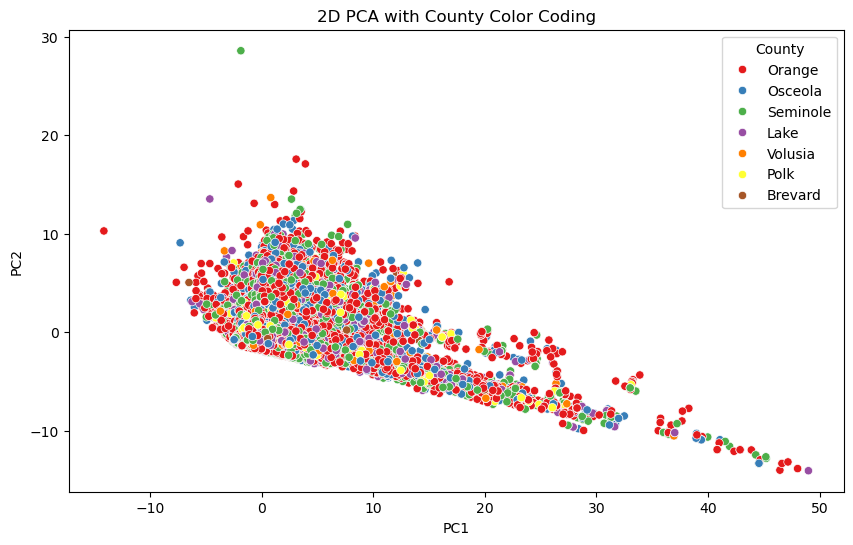

In [140]:
# Apply 2D PCA
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(normalized_df)

# Create a DataFrame for 2D PCA results
pca_df_2d = pd.DataFrame(data=pca_result_2d, columns=['PC1', 'PC2'])
pca_df_2d['County'] = county_df['County']

# Plot 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='County', data=pca_df_2d, palette='Set1')
plt.title('2D PCA with County Color Coding')
plt.show()

In [141]:
# Get the feature loadings for PC1 and PC2
loadings_df = pd.DataFrame(pca_2d.components_, columns=normalized_df.columns, index=['PC1', 'PC2'])

# Display the feature loadings
print("Feature Loadings for PC1:")
print(loadings_df.loc['PC1'].sort_values(ascending=False))

print("\nFeature Loadings for PC2:")
print(loadings_df.loc['PC2'].sort_values(ascending=False))

Feature Loadings for PC1:
n_accts                0.569
DividendCount          0.489
n_open_cds             0.462
n_savings_accts        0.275
n_checking_accts       0.263
age                    0.178
n_open_credit_cards    0.125
n_open_loans           0.093
ACHCount               0.053
Home_Banking           0.035
n_open_club_accts      0.019
BillPaymentCount       0.014
CashCount              0.008
WireCount              0.001
DraftCount            -0.016
ATMCount              -0.044
Credit_DebitCount     -0.062
FeeCount              -0.109
Name: PC1, dtype: float64

Feature Loadings for PC2:
n_open_loans           0.571
n_open_credit_cards    0.566
n_checking_accts       0.270
ACHCount               0.240
age                    0.214
Credit_DebitCount      0.168
BillPaymentCount       0.157
Home_Banking           0.153
ATMCount               0.086
DraftCount             0.074
CashCount              0.053
FeeCount               0.050
WireCount              0.014
n_open_club_accts     

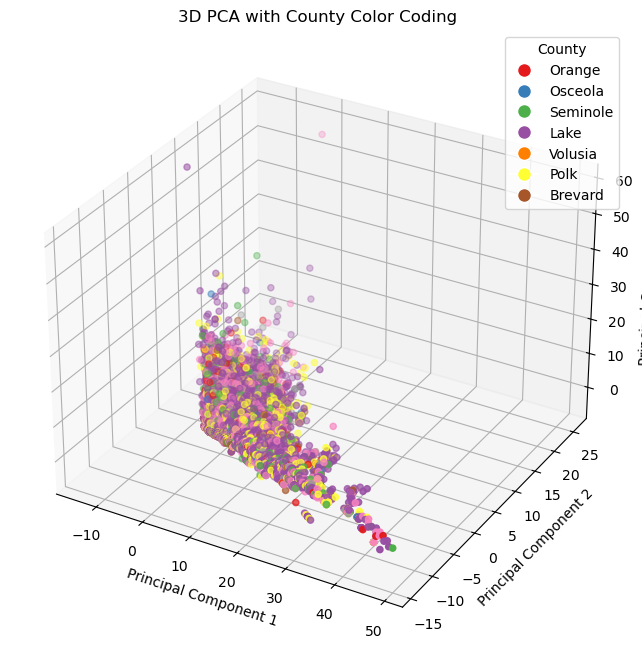

In [142]:
# Apply 3D PCA
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(normalized_df)

# Create a DataFrame for 3D PCA results
pca_df_3d = pd.DataFrame(data=pca_result_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['County'] = county_df['County']

# Plot 3D PCA
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter_3d = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['County'].astype('category').cat.codes, cmap='Set1')

# Create a legend
legend_labels = county_df['County'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('Set1')[i], markersize=10, label=label) for i, label in enumerate(legend_labels)]
ax.legend(handles=legend_handles, title='County', loc='upper right')

ax.set_title('3D PCA with County Color Coding')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

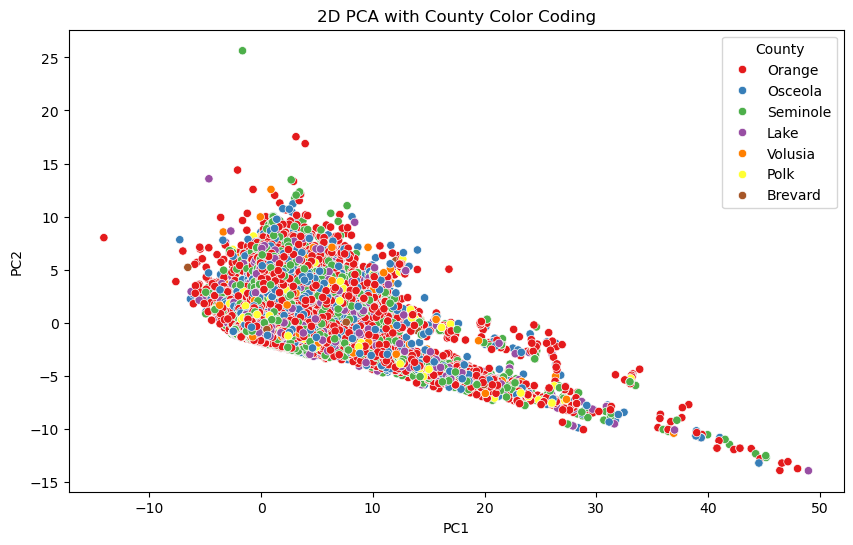

In [143]:
# Plot 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='County', data=pca_df_3d, palette='Set1')
plt.title('2D PCA with County Color Coding')
plt.show()

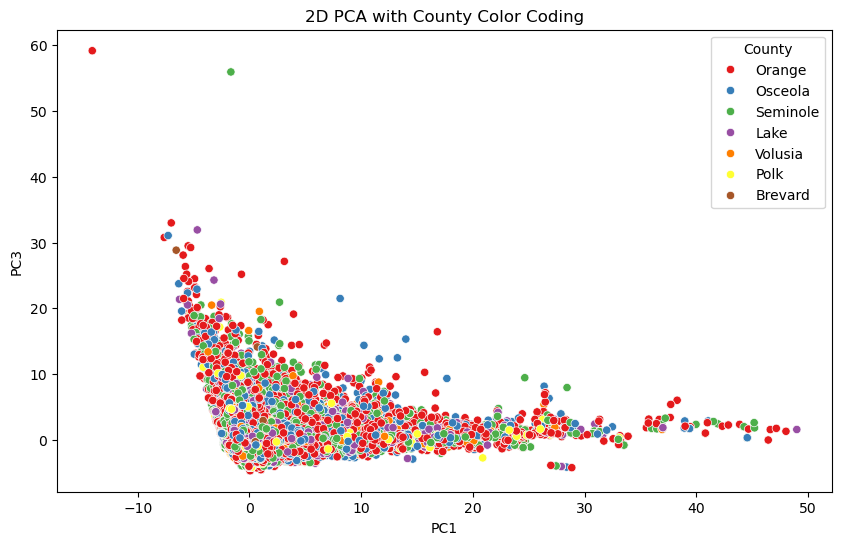

In [144]:
# Plot 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC3', hue='County', data=pca_df_3d, palette='Set1')
plt.title('2D PCA with County Color Coding')
plt.show()

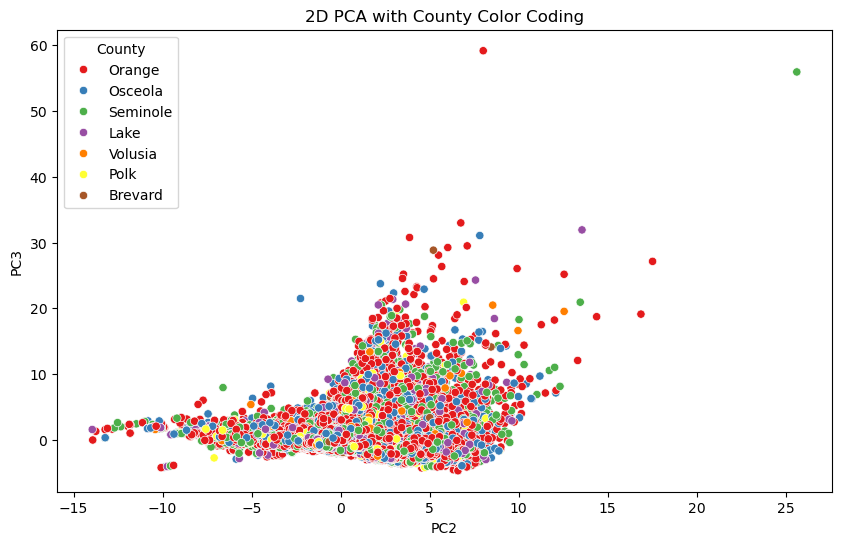

In [145]:
# Plot 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC2', y='PC3', hue='County', data=pca_df_3d, palette='Set1')
plt.title('2D PCA with County Color Coding')
plt.show()

In [146]:
# Get the feature loadings for PC1, PC2, and PC3
loadings_df = pd.DataFrame(pca_3d.components_, columns=normalized_df.columns, index=['PC1', 'PC2', 'PC3'])

# Display the feature loadings
print("Feature Loadings for PC1:")
print(loadings_df.loc['PC1'].sort_values(ascending=False))

print("\nFeature Loadings for PC2:")
print(loadings_df.loc['PC2'].sort_values(ascending=False))

print("\nFeature Loadings for PC3:")
print(loadings_df.loc['PC3'].sort_values(ascending=False))

Feature Loadings for PC1:
n_accts                0.569
DividendCount          0.489
n_open_cds             0.462
n_savings_accts        0.275
n_checking_accts       0.263
age                    0.178
n_open_credit_cards    0.125
n_open_loans           0.093
ACHCount               0.053
Home_Banking           0.035
n_open_club_accts      0.020
BillPaymentCount       0.014
CashCount              0.008
WireCount              0.001
DraftCount            -0.016
ATMCount              -0.044
Credit_DebitCount     -0.062
FeeCount              -0.109
Name: PC1, dtype: float64

Feature Loadings for PC2:
n_open_loans           0.573
n_open_credit_cards    0.569
n_checking_accts       0.274
ACHCount               0.232
age                    0.207
Credit_DebitCount      0.166
Home_Banking           0.153
BillPaymentCount       0.149
ATMCount               0.099
DraftCount             0.076
FeeCount               0.045
CashCount              0.044
WireCount              0.022
n_accts               

# Phase 1-3: Branch County PCA

*	EDA: Explore multicollinearity using variance inflation factors, pinpoint heteroscedasticity, and delineate variable relationships.

## Import Packages and Data

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings("ignore", category=FutureWarning)

In [148]:
branch_level_data = pd.read_csv('data/Branch_Level_Dataset.csv')
branch_level_data.head(5)

,EOM_TRANS_DATE,BranchCategory,ATM,Bill Payment,Cash,Draft,ACH,Fee,Credit/Debit Card,Home Banking,Dividend
0,2022-01-31,Addition Financial Arena,0,3,0,28,5,20,6,4,14
1,2022-01-31,Altamonte Springs,98,394,64,469,1589,416,1642,646,3650
2,2022-01-31,Apopka,198,540,132,705,2219,560,1983,724,5731
3,2022-01-31,Boone High School,1,10,2,8,30,9,80,21,59
4,2022-01-31,Clermont,143,482,103,499,1940,539,1834,580,4551


In [149]:
# print unique values for BranchCategory and their counts
print(branch_level_data['BranchCategory'].value_counts())

BranchCategory
MetroWest                    19
Sanford                      19
Oak Ridge High School        19
Ocoee High School            19
Orange City                  19
Oviedo                       19
Pine Hills                   19
Poinciana                    19
Poinciana High School        19
Seminole State               19
Altamonte Springs            19
South Orlando                19
St. Cloud                    19
St. Cloud High School        19
The Loop                     19
Timber Creek High School     19
UCF Campus                   19
Virtual Branch               19
Mills                        19
Winter Garden                19
Merritt Island               19
Longwood                     19
Apopka                       19
Boone High School            19
Clermont                     19
Colonial High School         19
Downtown Campus              19
East Orlando                 19
Edgewater High School        19
Eustis                       19
Fern Park                

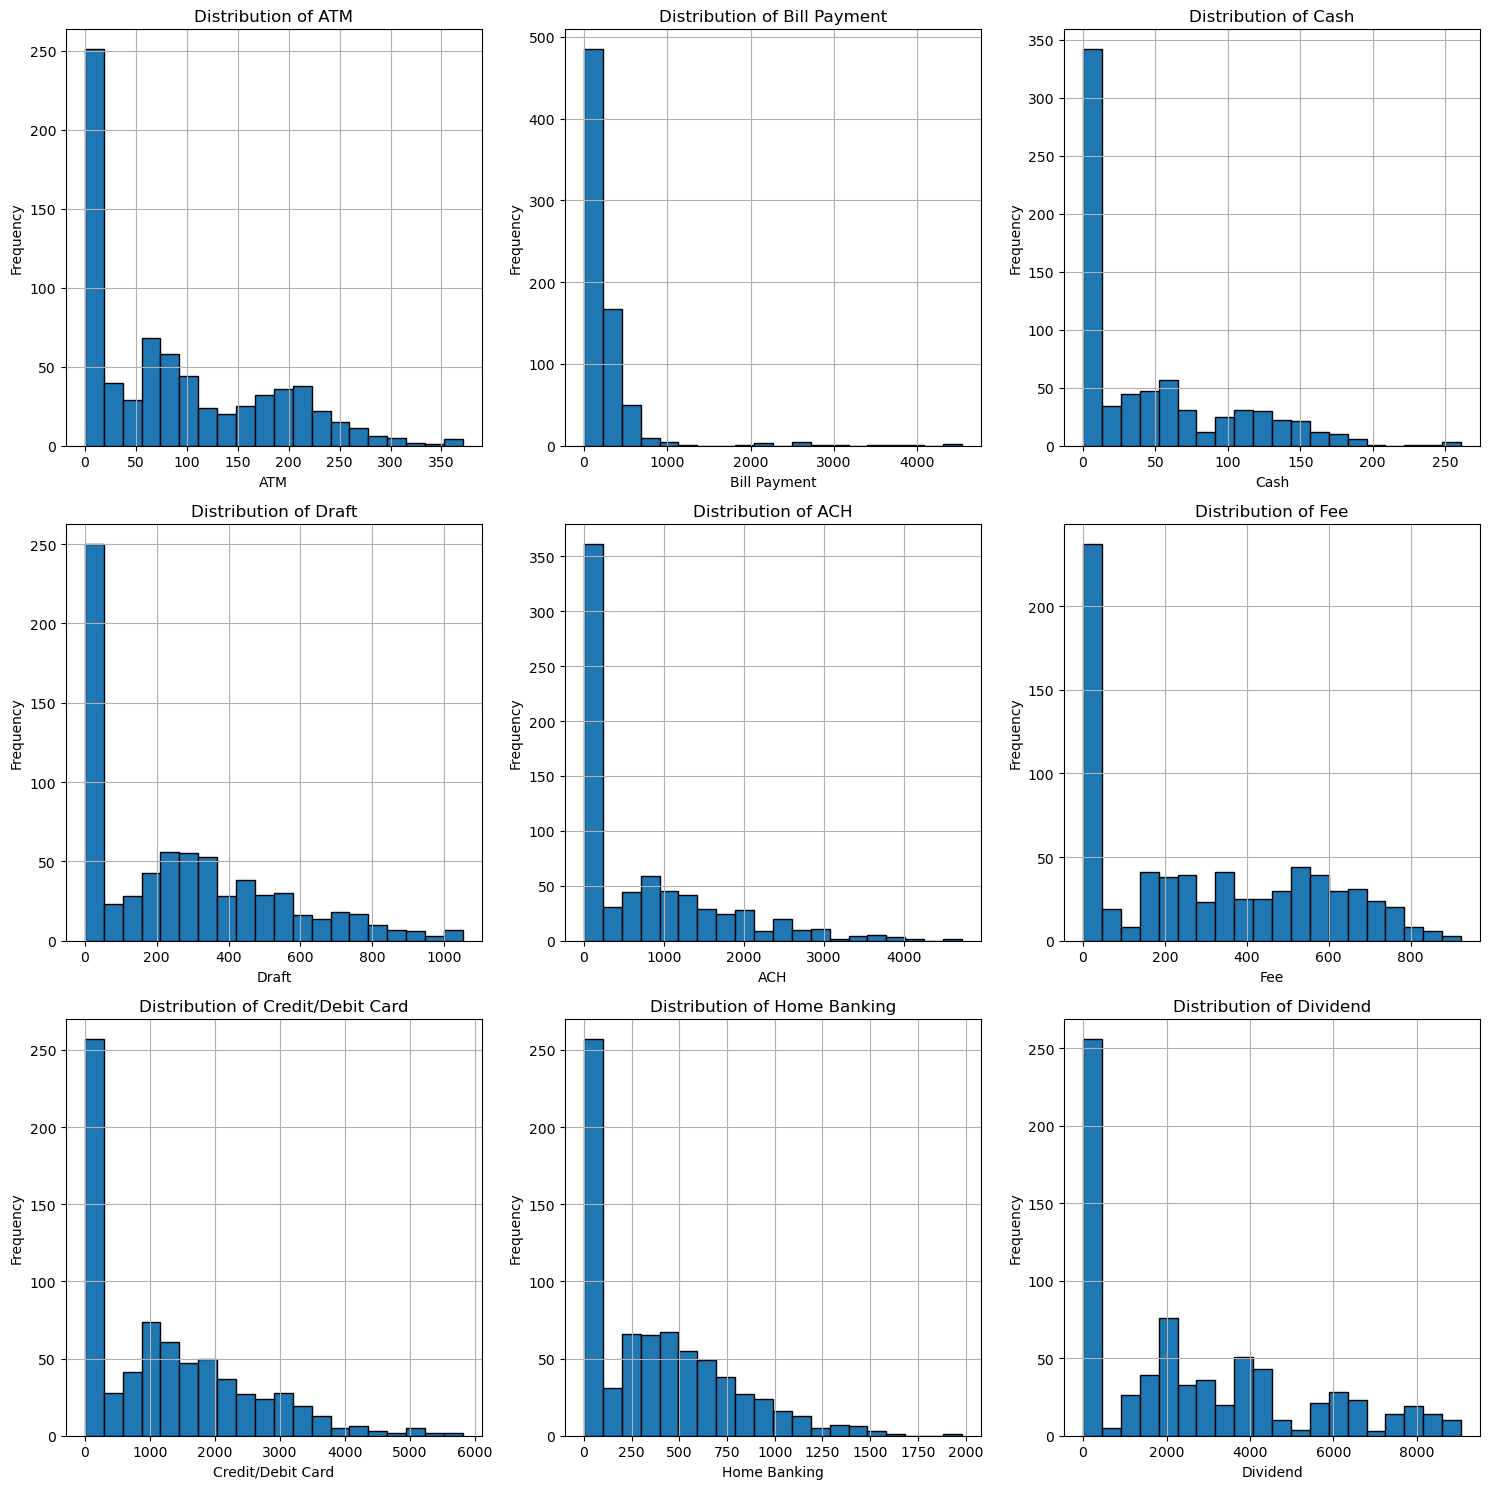

In [150]:
# Plot distribution graphs for each column
num_columns = len(branch_level_data.iloc[:, 2:11].columns)
num_rows = (num_columns - 1) // 3 + 1  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, column in enumerate(branch_level_data.iloc[:, 2:11].columns):
    row, col = divmod(i, 3)
    ax = axes[row, col]

    ax.hist(branch_level_data[column], bins=20, edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [151]:
# print unique values for EOM_TRANS_DATE
print(branch_level_data.EOM_TRANS_DATE.unique())

['2022-01-31' '2022-02-28' '2022-03-31' '2022-04-30' '2022-05-31'
 '2022-06-30' '2022-07-31' '2022-08-31' '2022-09-30' '2022-10-31'
 '2022-11-30' '2022-12-31' '2023-01-31' '2023-02-28' '2023-03-31'
 '2023-04-30' '2023-05-31' '2023-06-30' '2023-07-31']


## Data Preprocessing

In [152]:
# Remove rows where BranchCategory is 'High School' or 'Virtual Branch'
branch_level_data = branch_level_data[~branch_level_data['BranchCategory'].str.contains("High School|Virtual Branch")]

# Check for null values in the DataFrame
null_values = branch_level_data.isnull().sum()

# Displaying the DataFrame and the null values information
print(branch_level_data.head())
print(null_values)


  EOM_TRANS_DATE            BranchCategory  ATM  Bill Payment  Cash  Draft  \
0     2022-01-31  Addition Financial Arena    0             3     0     28   
1     2022-01-31         Altamonte Springs   98           394    64    469   
2     2022-01-31                    Apopka  198           540   132    705   
4     2022-01-31                  Clermont  143           482   103    499   
6     2022-01-31           Downtown Campus   27            35    12     62   

    ACH  Fee  Credit/Debit Card  Home Banking  Dividend  
0     5   20                  6             4        14  
1  1589  416               1642           646      3650  
2  2219  560               1983           724      5731  
4  1940  539               1834           580      4551  
6   134   78                227            47       275  
EOM_TRANS_DATE       0
BranchCategory       0
ATM                  0
Bill Payment         0
Cash                 0
Draft                0
ACH                  0
Fee                  0

In [153]:
# Load the Excel file
file_path = 'data/countyrevenuesbycategory.xlsx'
df_revenue = pd.read_excel(file_path)

# Selecting only the 'County' and 'TOTAL - All Revenue Account Codes' columns
# Assuming these are the first and the third-last columns in your DataFrame
df_revenue = df_revenue.iloc[:, [0, -3]]

# Renaming the columns for clarity
df_revenue.columns = ['County', 'Revenue_Per_County']

# Dropping the first row if it contains headers from the original table
df_revenue = df_revenue.drop(0)

# Displaying the modified DataFrame
print(df_revenue.head())



     County Revenue_Per_County
1   Alachua         1082349199
2     Baker           89157684
3       Bay         1193216378
4  Bradford           85933027
5   Brevard          958971976


In [154]:
# Map BranchCategory to County
city_to_county_mapping = {
    'Addition Financial Arena': 'Orange',
    'Altamonte Springs': 'Seminole',
    'Apopka': 'Orange',
    'Clermont': 'Lake',
    'Downtown Campus': 'Orange',
    'East Orlando': 'Orange',
    'Eustis': 'Lake',
    'Fern Park': 'Seminole',
    'Kissimmee': 'Osceola',
    'Lake Mary': 'Seminole',
    'Lake Nona': 'Orange',
    'Leesburg': 'Lake',
    'Longwood': 'Seminole',
    'Merritt Island': 'Brevard',
    'MetroWest': 'Orange',
    'Mills': 'Orange',
    'Orange City': 'Volusia',
    'Oviedo': 'Seminole',
    'Pine Hills': 'Orange',
    'Poinciana': 'Polk',
    'Sanford': 'Seminole',
    'Seminole State': 'Seminole',
    'South Orlando': 'Orange',
    'St. Cloud': 'Osceola',
    'The Loop': 'Osceola',
    'UCF Campus': 'Orange',
    'UCF Commons': 'Orange',
    'Winter Garden': 'Orange'
}

branch_level_data['County'] = branch_level_data['BranchCategory'].map(city_to_county_mapping)

# Load revenue data
file_path = 'data/countyrevenuesbycategory.xlsx'
df_revenue = pd.read_excel(file_path)

# Selecting only 'County' and 'TOTAL - All Revenue Account Codes' columns
df_revenue = df_revenue.iloc[:, [0, -3]]
df_revenue.columns = ['County', 'Revenue_Per_County']
df_revenue = df_revenue.drop(0)

# Merging the DataFrames
branch_level_data = pd.merge(branch_level_data, df_revenue, on='County', how='left')

# Displaying the combined DataFrame
branch_level_data.head()


,EOM_TRANS_DATE,BranchCategory,ATM,Bill Payment,Cash,Draft,ACH,Fee,Credit/Debit Card,Home Banking,Dividend,County,Revenue_Per_County
0,2022-01-31,Addition Financial Arena,0,3,0,28,5,20,6,4,14,Orange,6968835122
1,2022-01-31,Altamonte Springs,98,394,64,469,1589,416,1642,646,3650,Seminole,1830400546
2,2022-01-31,Apopka,198,540,132,705,2219,560,1983,724,5731,Orange,6968835122
3,2022-01-31,Clermont,143,482,103,499,1940,539,1834,580,4551,Lake,1003940427
4,2022-01-31,Downtown Campus,27,35,12,62,134,78,227,47,275,Orange,6968835122


In [155]:
# Dropping unnecessary columns
pre_normalized_df = branch_level_data.drop(['EOM_TRANS_DATE', 'BranchCategory', 'County', 'Revenue_Per_County'], axis=1)
pre_normalized_df.head()

,ATM,Bill Payment,Cash,Draft,ACH,Fee,Credit/Debit Card,Home Banking,Dividend
0,0,3,0,28,5,20,6,4,14
1,98,394,64,469,1589,416,1642,646,3650
2,198,540,132,705,2219,560,1983,724,5731
3,143,482,103,499,1940,539,1834,580,4551
4,27,35,12,62,134,78,227,47,275


In [156]:
from sklearn.preprocessing import StandardScaler

# Create the Scaler object
scaler = StandardScaler()

# Fit the data on the scaler object
normalized_df = scaler.fit_transform(pre_normalized_df)

# Convert the normalized DataFrame into a DataFrame
normalized_df = pd.DataFrame(normalized_df, columns=pre_normalized_df.columns)
# normalized_df.columns = [col + '_norm' for col in normalized_df.columns]
normalized_df.head()

,ATM,Bill Payment,Cash,Draft,ACH,Fee,Credit/Debit Card,Home Banking,Dividend
0,-1.449,-0.617,-1.138,-1.349,-1.027,-1.596,-1.436,-1.446,-1.485
1,-0.280,0.139,0.004,0.434,0.593,0.099,-0.040,0.381,0.030
2,0.914,0.421,1.218,1.388,1.237,0.716,0.251,0.603,0.897
3,0.257,0.309,0.700,0.555,0.951,0.626,0.123,0.193,0.405
4,-1.127,-0.555,-0.924,-1.211,-0.895,-1.348,-1.248,-1.323,-1.376


## PCA Analysis

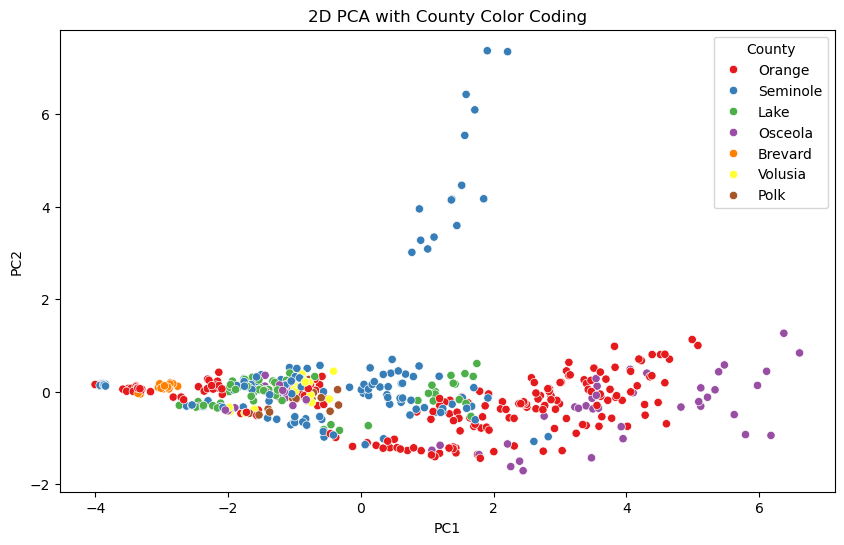

In [157]:
# Apply 2D PCA
from sklearn.decomposition import PCA


pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(normalized_df)

# Create a DataFrame for 2D PCA results
pca_df_2d = pd.DataFrame(data=pca_result_2d, columns=['PC1', 'PC2'])
pca_df_2d['County'] = branch_level_data['County']

# Plot 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='County', data=pca_df_2d, palette='Set1')
plt.title('2D PCA with County Color Coding')
plt.show()

In [158]:
# Print the explained variance ratio
explained_variance_ratio = pca_2d.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.73354733 0.10260918]


In [159]:
# Visualize the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

Cumulative Explained Variance: [0.73354733 0.83615651]


In [160]:
# Get the feature loadings for PC1 and PC2
loadings_df = pd.DataFrame(pca_2d.components_, columns=normalized_df.columns, index=['PC1', 'PC2'])

# Display the feature loadings
print("Feature Loadings for PC1:")
print(loadings_df.loc['PC1'].sort_values(ascending=False))

print("\nFeature Loadings for PC2:")
print(loadings_df.loc['PC2'].sort_values(ascending=False))

Feature Loadings for PC1:
Home Banking        0.375
Draft               0.370
Fee                 0.369
Dividend            0.362
ATM                 0.340
Credit/Debit Card   0.335
Cash                0.321
ACH                 0.314
Bill Payment        0.160
Name: PC1, dtype: float64

Feature Loadings for PC2:
Bill Payment         0.866
ACH                  0.299
Draft                0.050
Home Banking         0.024
Cash                -0.020
Dividend            -0.099
Fee                 -0.122
Credit/Debit Card   -0.228
ATM                 -0.283
Name: PC2, dtype: float64


In [161]:
# Apply 3D PCA
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(normalized_df)

# Create a DataFrame for 3D PCA results
pca_df_3d = pd.DataFrame(data=pca_result_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['County'] = branch_level_data['County']

# Plot 3D PCA with Plotly
fig = px.scatter_3d(pca_df_3d, x='PC1', y='PC2', z='PC3', color='County', labels={'County': 'County'}, 
                    title='3D PCA with County Color Coding', opacity=0.7, width=1100, height=800,
                    color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker_size=5)
fig.update_layout(legend_title_text='County', legend=dict(yanchor="top", y=0.79, xanchor="left", x=0.01))

# Show the interactive 3D plot
fig.show()

In [162]:
# Print the explained variance ratio
explained_variance_ratio = pca_3d.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.73354733 0.10260918 0.080207  ]


In [163]:
# Visualize the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

Cumulative Explained Variance: [0.73354733 0.83615651 0.91636351]


In [164]:
# Get the feature loadings for PC1, PC2, and PC3
loadings_df = pd.DataFrame(pca_3d.components_, columns=normalized_df.columns, index=['PC1', 'PC2', 'PC3'])

# Display the feature loadings
print("Feature Loadings for PC1:")
print(loadings_df.loc['PC1'].sort_values(ascending=False))

print("\nFeature Loadings for PC2:")
print(loadings_df.loc['PC2'].sort_values(ascending=False))

print("\nFeature Loadings for PC3:")
print(loadings_df.loc['PC3'].sort_values(ascending=False))

Feature Loadings for PC1:
Home Banking        0.375
Draft               0.370
Fee                 0.369
Dividend            0.362
ATM                 0.340
Credit/Debit Card   0.335
Cash                0.321
ACH                 0.314
Bill Payment        0.160
Name: PC1, dtype: float64

Feature Loadings for PC2:
Bill Payment         0.866
ACH                  0.299
Draft                0.050
Home Banking         0.024
Cash                -0.020
Dividend            -0.099
Fee                 -0.122
Credit/Debit Card   -0.228
ATM                 -0.283
Name: PC2, dtype: float64

Feature Loadings for PC3:
Credit/Debit Card    0.473
Bill Payment         0.382
Dividend             0.263
Fee                  0.137
ATM                  0.097
Home Banking        -0.014
Draft               -0.217
Cash                -0.480
ACH                 -0.505
Name: PC3, dtype: float64


In [165]:
pca_df_3d['Revenue_Per_County'] = branch_level_data['Revenue_Per_County']
pca_df_3d.head()

,PC1,PC2,PC3,County,Revenue_Per_County
0,-3.928,0.158,-0.286,Orange,6968835122
1,0.452,0.401,-0.372,Seminole,1830400546
2,2.570,0.302,-0.817,Orange,6968835122
3,1.357,0.353,-0.546,Lake,1003940427
4,-3.408,0.082,-0.281,Orange,6968835122


In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X = pca_df_3d.drop(columns=['Revenue_Per_County','County'])
y = pca_df_3d['Revenue_Per_County']

# Convert 'Revenue_Per_County' to numeric, in case it's not
y = pd.to_numeric(y, errors='coerce')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2):', r2_score(y_test, y_pred))

# Optionally, print the coefficients for each feature
feature_coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(feature_coefficients)

Mean Squared Error: 6.396534929290373e+18
Coefficient of Determination (R^2): 0.0794782305544427
       Coefficient
PC1  141095993.505
PC2 -458644205.546
PC3  -53211427.264


In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Variable   VIF
0      PC1 1.000
1      PC2 1.000
2      PC3 1.000
